In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/rishirajjain/Desktop/untitled folder 2/Telecom_customer churn.csv')

In [3]:
df.head(5)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [5]:
df.isna().sum() / len(df)

rev_Mean       0.00357
mou_Mean       0.00357
totmrc_Mean    0.00357
da_Mean        0.00357
ovrmou_Mean    0.00357
                ...   
kid11_15       0.01732
kid16_17       0.01732
creditcd       0.01732
eqpdays        0.00001
Customer_ID    0.00000
Length: 100, dtype: float64

<Axes: >

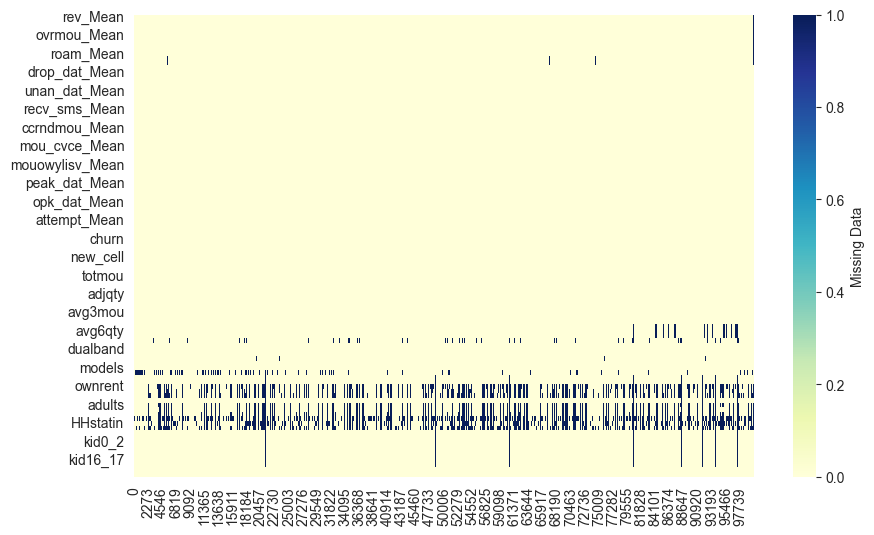

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [7]:
#  function to fill in missing values using median
def data_imputation(data, column_grouping, column_selected):
    # Parameter meaning
    # data => The name of the dataframe to be processed
    # column_grouping => The column used to group values and take the median
    # column_selected => The column in which we will fill its NaN values

    # Get unique category groups
    group = data[column_grouping].unique()

    # Loop through each value in the group category
    for value in group:
        # get median
        median = data.loc[(data[column_grouping]==value) & ~(data[column_selected].isna()), column_selected].median()

        # change missing value
        data.loc[(data[column_grouping]==value) & (data[column_selected].isna()), column_selected] = median

    # Return the dataframe after filling the missing values
    return data

In [8]:
df = data_imputation(data=df, column_grouping='age_category', column_selected='total_income')


KeyError: 'age_category'

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev'

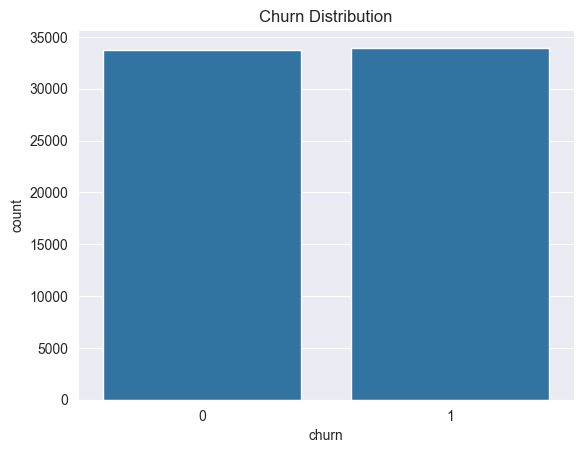

ValueError: could not convert string to float: 'N'

<Figure size 1200x800 with 0 Axes>

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Load the dataset
df = pd.read_csv('/Users/rishirajjain/Desktop/untitled folder 2/Telecom_customer churn.csv')
# Print column names to check for 'Churn'
print(df.columns)
# Clean column names (optional)
df.columns = df.columns.str.strip().str.lower()  # Removes leading/trailing spaces and converts to lowercase
# Data Preprocessing
# Handling missing values by forward fill
df.fillna(method='ffill', inplace=True)
# Handling outliers using Z-score (removing rows where Z > 3)
from scipy import stats
df = df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]
# Feature Scaling using StandardScaler (excluding the 'churn' column)
scaler = StandardScaler()
numeric_features = df.drop(columns=['churn']).select_dtypes(include=[np.number]).columns  # Exclude 'churn'
df[numeric_features] = scaler.fit_transform(df[numeric_features])
# Exploratory Data Analysis (EDA)
# Visualizing Churn distribution
sns.countplot(x='churn', data=df)  # Assuming 'churn' is now the correct column name
plt.title('Churn Distribution')
plt.show()
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
# Building the Linear Regression Model
# Splitting the dataset into features and target
X = df.drop(columns=['churn'])  # Features
y = df['churn']  # Target
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on test data
y_pred = model.predict(X_test)
y_pred = [1 if x > 0.5 else 0 for x in y_pred]  # Binarizing the predictions
# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")